#O challenge

O challenge é para resolver um problema da compahia fictícia Alura Voz, que presta de serviço de planos de telefonia e internet. O desafio geral consiste em reduzir a taxa de evasão dos clientes.

##Primeira semana do challenge

Nessa primeira semana, a companhia Alura Voz disponibilizou os dados dos seus clientes em formato json. Preferi não fazer o download desses dados e trabalhar a versão disponível online [nesse link](https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json).

No challenge foi feito através da metodologia ágil, com as tarefas distribuídas em cartões no Trello.

As atividades da primeira semana são:

1.   Entender quais informações o conjunto de dados possui;
2.   Analisar quais os tipos de dados;
3.   Verificar quais são as inconsistências nos dados;
4.   Corrigir as inconsistências.

Além disso, temos algumas atividades opcionais:

*   Traduzir as colunas e dados;
*   Criar coluna de contas diárias.

###Importando os dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
URI = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'
df = pd.read_json(path_or_buf = URI)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Percebemos que os dados das colunas "customer", "phone", "internet" e "account" estão encapsuladas. A seguir os dados serão serparados através do comando json_normalize. A fim de melhor organização, tratarei os dados de cada coluna de forma separada.

###Tratamento dos dados

#####Tabela Customer

In [3]:
df_customer = pd.json_normalize(data = df.customer)
df_customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


#####Tabela Phone

In [4]:
df_phone = pd.json_normalize(data = df.phone)
df_phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


#####Tabela Internet

In [5]:
df_internet = pd.json_normalize(data = df.internet)
df_internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


#####Tabela account

In [6]:
df_account = pd.json_normalize(data = df.account)
df_account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


#####Tabela original

In [7]:
df = df[['customerID', 'Churn']]
df.head()

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes


Aqui fiz um filtro da tabela original, retirando as colunas que estavam com os dados encapsulados e mantive apenas o ID dos clientes e os dados de Churn.

#####Juntando os um único dataframe

In [8]:
dados = pd.concat([df, df_customer, df_phone, df_internet, df_account], axis = 1)
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Consolidei todos os dados tratados em um unico dataset. Aqui seguiremos analisando e tratandos os dados para tirar os insights.

###1. Entendendo quais informações o conjunto de dados possui

In [9]:
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [10]:
dados.isnull().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Veriricado que o dataset não tem dados marcados como nulos. Mas será que é isso mesmo? Faremos uma análise detalhada de cada coluna para fazer um double check.

###2. Analisando os tipos dos dados

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Verificamos aqui que a coluna SeniorCitizen está como int64 enquanto as demais colunas com dados semelhantes estão como object. Percebemos também que as colunas de pagamento, com exceção da Charges.Monthly não estão identificadas como números e sim string.

### Traduzindo as colunas

In [12]:
# Tradução das colunas
dados.rename(columns = {
    'customerID' : 'ID_cliente',
    'Churn' : 'Evasao',
    'gender' : 'Genero',
    'SeniorCitizen' : 'Idoso',
    'Partner' : 'Parceiro',
    'Dependents' : 'Dependentes',
    'tenure' : 'Meses_contrato',
    'PhoneService' : 'Servico_telefonia',
    'MultipleLines' : 'Multiplas_linhas',
    'InternetService' : 'Servico_internet',
    'OnlineSecurity' : 'Seguranca_online',
    'OnlineBackup' : 'Backup_online',
    'DeviceProtection' : 'Protecao_dispositivo',
    'TechSupport' : 'Suporte_tecnico',
    'StreamingTV' : 'Tv_a_cabo',
    'StreamingMovies' : 'Streaming_filmes',
    'Contract' : 'Tipo_contrato',
    'PaperlessBilling' : 'Fatura_digital',
    'PaymentMethod' : 'Forma_pagamento',
    'Charges.Monthly' : 'Pagamento_mensal',
    'Charges.Total' : 'Pagamento_total'
}, inplace = True)

dados.head()

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_contrato,Servico_telefonia,Multiplas_linhas,Servico_internet,...,Backup_online,Protecao_dispositivo,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Pagamento_mensal,Pagamento_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


###3. e 4. Verificando e corrigindo as inconsistências no dados

#### Coluna Evasão

In [13]:
dados.Evasao.unique()

array(['No', 'Yes', ''], dtype=object)

Verificado que existem linhas com os dados sem informações. Como essa é a coluna chave do nosso dataset, descondideraremos os dados com essa caractarística.

In [14]:
dados.Evasao.value_counts()

No     5174
Yes    1869
        224
Name: Evasao, dtype: int64

In [15]:
filtro = dados.Evasao != ''
dados = dados[filtro]
dados.Evasao.value_counts()

No     5174
Yes    1869
Name: Evasao, dtype: int64

In [16]:
dic_zero_um = {'Yes' : 0, 'No' : 1}

dados.Evasao = dados.Evasao.map(dic_zero_um)
dados.head(3)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_contrato,Servico_telefonia,Multiplas_linhas,Servico_internet,...,Backup_online,Protecao_dispositivo,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Pagamento_mensal,Pagamento_total
0,0002-ORFBO,1,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,1,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,0,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


Como futuramente usaremos esses dados em modelos de classificação de Machine Learning e como são apenas dois tipos de dados, transformei os dados em numérico.

In [17]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_cliente            7043 non-null   object 
 1   Evasao                7043 non-null   int64  
 2   Genero                7043 non-null   object 
 3   Idoso                 7043 non-null   int64  
 4   Parceiro              7043 non-null   object 
 5   Dependentes           7043 non-null   object 
 6   Meses_contrato        7043 non-null   int64  
 7   Servico_telefonia     7043 non-null   object 
 8   Multiplas_linhas      7043 non-null   object 
 9   Servico_internet      7043 non-null   object 
 10  Seguranca_online      7043 non-null   object 
 11  Backup_online         7043 non-null   object 
 12  Protecao_dispositivo  7043 non-null   object 
 13  Suporte_tecnico       7043 non-null   object 
 14  Tv_a_cabo             7043 non-null   object 
 15  Streaming_filmes     

#### Coluna Genero

In [18]:
dados.Genero.unique()

array(['Female', 'Male'], dtype=object)

In [19]:
dados.Genero.value_counts()

Male      3555
Female    3488
Name: Genero, dtype: int64

In [20]:
dic_sexo = {
    'Male' : 'Masculino',
    'Female' : 'Feminino'
}

dados.Genero = dados.Genero.map(dic_sexo)
dados.head(3)

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_contrato,Servico_telefonia,Multiplas_linhas,Servico_internet,...,Backup_online,Protecao_dispositivo,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Pagamento_mensal,Pagamento_total
0,0002-ORFBO,1,Feminino,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,1,Masculino,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,0,Masculino,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


#### Coluna Idoso

In [21]:
dados.Idoso.unique()

array([0, 1])

In [22]:
dados.Idoso.value_counts()

0    5901
1    1142
Name: Idoso, dtype: int64

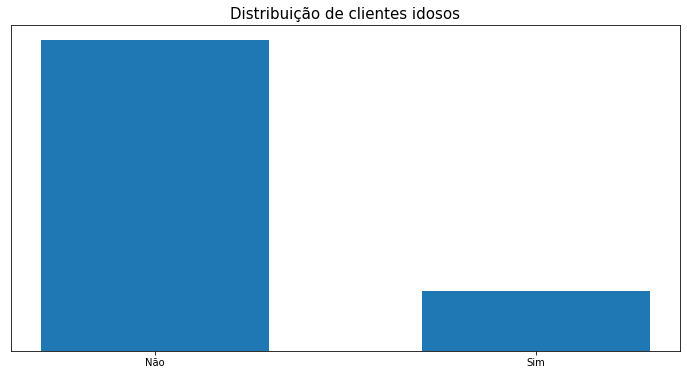

In [23]:
plt.figure(figsize = (12,6))

contagem = round(dados.Idoso.value_counts(), 2)
labels = ['Não', 'Sim']
plt.title('Distribuição de clientes idosos', fontsize = 15)
plt.bar(labels, contagem, width = 0.6)
plt.yticks([])

plt.show()

#### Coluna Parceiro

In [24]:
dados.Parceiro.unique()

array(['Yes', 'No'], dtype=object)

In [25]:
dados.Parceiro.value_counts()

No     3641
Yes    3402
Name: Parceiro, dtype: int64

In [26]:
dados.Parceiro = dados.Parceiro.map(dic_zero_um)
dados.head(3)

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_contrato,Servico_telefonia,Multiplas_linhas,Servico_internet,...,Backup_online,Protecao_dispositivo,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Pagamento_mensal,Pagamento_total
0,0002-ORFBO,1,Feminino,0,0,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,1,Masculino,0,1,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,0,Masculino,0,1,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


#### Coluna Dependentes

In [27]:
dados.Dependentes.unique()

array(['Yes', 'No'], dtype=object)

In [28]:
dados.Dependentes.value_counts()

No     4933
Yes    2110
Name: Dependentes, dtype: int64

In [29]:
dados.Dependentes = dados.Dependentes.map(dic_zero_um)
dados.head(3)

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_contrato,Servico_telefonia,Multiplas_linhas,Servico_internet,...,Backup_online,Protecao_dispositivo,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Pagamento_mensal,Pagamento_total
0,0002-ORFBO,1,Feminino,0,0,0,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,1,Masculino,0,1,1,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,0,Masculino,0,1,1,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


#### Coluna Meses_contrato

In [30]:
dados.Meses_contrato.unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14, 35,
       64, 39, 40, 11,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 31, 36, 17,
       18, 51, 38, 42,  0])

In [31]:
dados.Meses_contrato.describe().round(2)

count    7043.00
mean       32.37
std        24.56
min         0.00
25%         9.00
50%        29.00
75%        55.00
max        72.00
Name: Meses_contrato, dtype: float64

Vemos aqui que os clientes de maior tempo na companhia são de 6 anos.

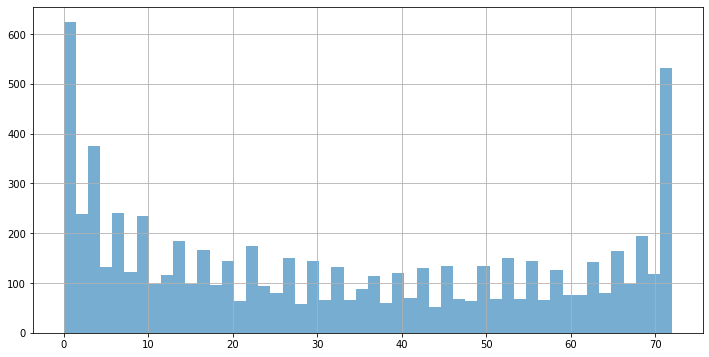

In [32]:
ax = dados.Meses_contrato.hist(alpha = 0.6, bins = 50, figsize=(12,6))
ax

#### Coluna Servico_telefonia

In [33]:
dados.Servico_telefonia.unique()

array(['Yes', 'No'], dtype=object)

In [34]:
dados.Servico_telefonia.value_counts()

Yes    6361
No      682
Name: Servico_telefonia, dtype: int64

In [35]:
dados.Servico_telefonia = dados.Servico_telefonia.map(dic_zero_um)
dados.head(3)

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_contrato,Servico_telefonia,Multiplas_linhas,Servico_internet,...,Backup_online,Protecao_dispositivo,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Pagamento_mensal,Pagamento_total
0,0002-ORFBO,1,Feminino,0,0,0,9,0,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,1,Masculino,0,1,1,9,0,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,0,Masculino,0,1,1,4,0,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


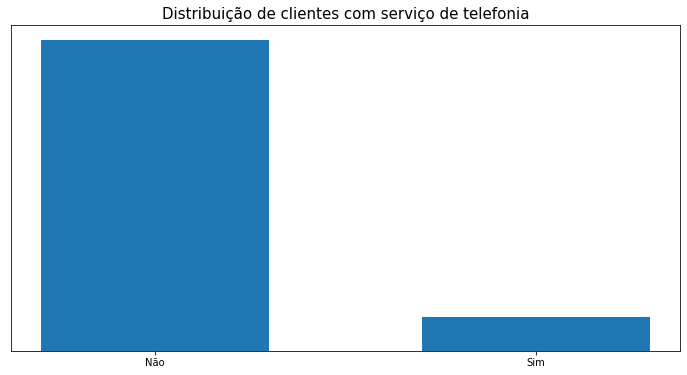

In [36]:
plt.figure(figsize = (12,6))

contagem = round(dados.Servico_telefonia.value_counts(), 2)
labels = ['Não', 'Sim']
plt.title('Distribuição de clientes com serviço de telefonia', fontsize = 15)
plt.bar(labels, contagem, width = 0.6)
plt.yticks([])

plt.show()

#### Coluna Multiplas_linhas

In [37]:
dados.Multiplas_linhas.unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [38]:
dados.Multiplas_linhas.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: Multiplas_linhas, dtype: int64

In [39]:
dic_telefones = {
    'Yes' : 0,
    'No' : 1,
    'No phone service' : 2
}

dados.Multiplas_linhas = dados.Multiplas_linhas.map(dic_telefones)
dados.head(3)

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_contrato,Servico_telefonia,Multiplas_linhas,Servico_internet,...,Backup_online,Protecao_dispositivo,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Pagamento_mensal,Pagamento_total
0,0002-ORFBO,1,Feminino,0,0,0,9,0,1,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,1,Masculino,0,1,1,9,0,0,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,0,Masculino,0,1,1,4,0,1,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


#### Coluna Servico_internet

In [40]:
dados.Servico_internet.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [41]:
dados.Servico_internet.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: Servico_internet, dtype: int64

In [42]:
dic_internet = {
    'DSL' : 'DSL',
    'Fiber optic' : 'Fibra optica',
    'No' : 'Não'
}

dados.Servico_internet = dados.Servico_internet.map(dic_internet)
dados.head(3)

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_contrato,Servico_telefonia,Multiplas_linhas,Servico_internet,...,Backup_online,Protecao_dispositivo,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Pagamento_mensal,Pagamento_total
0,0002-ORFBO,1,Feminino,0,0,0,9,0,1,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,1,Masculino,0,1,1,9,0,0,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,0,Masculino,0,1,1,4,0,1,Fibra optica,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


#### Coluna Seguranca_online

In [43]:
dados.Seguranca_online.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [44]:
dados.Seguranca_online.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: Seguranca_online, dtype: int64

In [45]:
dic_internet2 = {
    'Yes' : 0,
    'No' : 1,
    'No internet service' : 4
}

dados.Seguranca_online = dados.Seguranca_online.map(dic_internet2)
dados.Seguranca_online.head()

0    1
1    1
2    1
3    1
4    1
Name: Seguranca_online, dtype: int64

#### Coluna Backup_online

In [46]:
dados.Backup_online.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [47]:
dados.Backup_online.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: Backup_online, dtype: int64

In [48]:
dados.Backup_online = dados.Backup_online.map(dic_internet2)
dados.Backup_online.head()

0    0
1    1
2    1
3    0
4    1
Name: Backup_online, dtype: int64

#### Coluna Protecao_dispositivo

In [49]:
dados.Protecao_dispositivo.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [50]:
dados.Protecao_dispositivo.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: Protecao_dispositivo, dtype: int64

In [51]:
dados.Protecao_dispositivo = dados.Protecao_dispositivo.map(dic_internet2)
dados.Protecao_dispositivo.head()

0    1
1    1
2    0
3    0
4    1
Name: Protecao_dispositivo, dtype: int64

#### Coluna Suporte_tecnico

In [52]:
dados.Suporte_tecnico.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [53]:
dados.Suporte_tecnico.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: Suporte_tecnico, dtype: int64

In [54]:
dados.Suporte_tecnico = dados.Suporte_tecnico.map(dic_internet2)
dados.Suporte_tecnico.head()

0    0
1    1
2    1
3    1
4    0
Name: Suporte_tecnico, dtype: int64

#### Coluna Tv_a_cabo

In [55]:
dados.Tv_a_cabo.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [56]:
dados.Tv_a_cabo.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: Tv_a_cabo, dtype: int64

In [57]:
dados.Tv_a_cabo = dados.Tv_a_cabo.map(dic_internet2)
dados.Tv_a_cabo.head()

0    0
1    1
2    1
3    0
4    0
Name: Tv_a_cabo, dtype: int64

#### Coluna Streaming_filmes

In [58]:
dados.Streaming_filmes.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [59]:
dados.Streaming_filmes.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: Streaming_filmes, dtype: int64

In [60]:
dados.Streaming_filmes = dados.Streaming_filmes.map(dic_internet2)
dados.Streaming_filmes.head()

0    1
1    0
2    1
3    0
4    1
Name: Streaming_filmes, dtype: int64

#### Coluna Tipo_contrato

In [61]:
dados.Tipo_contrato.unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [62]:
dados.Tipo_contrato.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Tipo_contrato, dtype: int64

In [63]:
dic_contrato = {
   'Month-to-month' : 'Mensal',
    'Two year' : 'Dois anos',
    'One year' : 'Um ano'
}

dados.Tipo_contrato = dados.Tipo_contrato.map(dic_contrato)
dados.Tipo_contrato.head()

0    Um ano
1    Mensal
2    Mensal
3    Mensal
4    Mensal
Name: Tipo_contrato, dtype: object

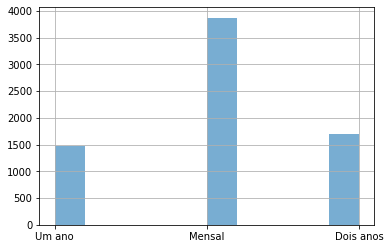

In [64]:
ax = dados.Tipo_contrato.hist(alpha = 0.6, figsize=(6,4))
ax

#### Coluna Fatura_digital

In [65]:
dados.Fatura_digital.unique()

array(['Yes', 'No'], dtype=object)

In [66]:
dados.Fatura_digital.value_counts()

Yes    4171
No     2872
Name: Fatura_digital, dtype: int64

In [67]:
dados.Fatura_digital = dados.Fatura_digital.map(dic_zero_um)
dados.Fatura_digital.head()

0    0
1    1
2    0
3    0
4    0
Name: Fatura_digital, dtype: int64

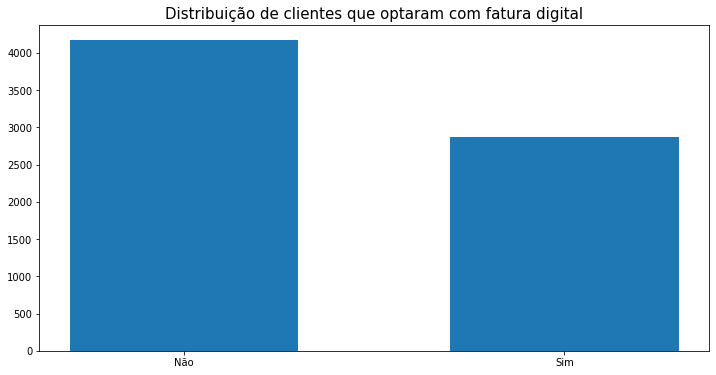

In [68]:
plt.figure(figsize = (12,6))

contagem = round(dados.Fatura_digital.value_counts(), 2)
labels = ['Não', 'Sim']
plt.title('Distribuição de clientes que optaram com fatura digital', fontsize = 15)
plt.bar(labels, contagem, width = 0.6)
plt.yticks()

plt.show()

#### Coluna Forma_pagamento

In [69]:
dados.Forma_pagamento.unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [70]:
dados.Forma_pagamento.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: Forma_pagamento, dtype: int64

In [71]:
dic_forma_pgto = {
    'Electronic check' : 'Pagamento eletrônico',
    'Mailed check' : 'Boleto',
    'Bank transfer (automatic)' : 'Transferência bancária (automático)',
    'Credit card (automatic)' : 'Cartão de crédito (automático)'
}

dados.Forma_pagamento = dados.Forma_pagamento.map(dic_forma_pgto)
dados.Forma_pagamento.head()

0                  Boleto
1                  Boleto
2    Pagamento eletrônico
3    Pagamento eletrônico
4                  Boleto
Name: Forma_pagamento, dtype: object

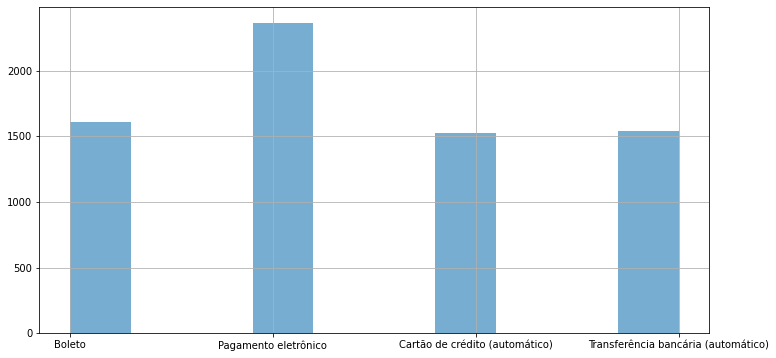

In [72]:
ax = dados.Forma_pagamento.hist(alpha = 0.6, figsize=(12,6))
ax

#### Coluna Pagamento_mensal

In [73]:
dados.Pagamento_mensal.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: Pagamento_mensal, dtype: float64

Vemos aqui que a assinatura mais barata é de 18.25 dolares e a mais cara 118.75 dolares.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


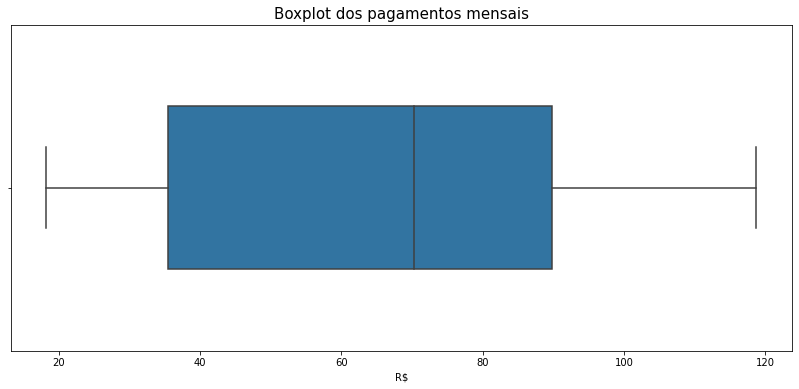

In [74]:
ax = sns.boxplot('Pagamento_mensal', data = dados, width = 0.5)
ax.figure.set_size_inches(14,6)
ax.set_title('Boxplot dos pagamentos mensais', fontsize = 15)
ax.set_xlabel('R$', fontsize = 10)
ax

#### Coluna Pagamento_total

In [75]:
dados.Pagamento_total.describe()

count     7043
unique    6531
top           
freq        11
Name: Pagamento_total, dtype: object

In [76]:
dados.Pagamento_total = pd.to_numeric(dados.Pagamento_total, errors = 'coerce')

In [77]:
dados.Pagamento_total.isnull().sum()

11

In [78]:
dados = dados.dropna()
dados.Pagamento_total.isnull().sum()

0

In [79]:
dados.Pagamento_total.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: Pagamento_total, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


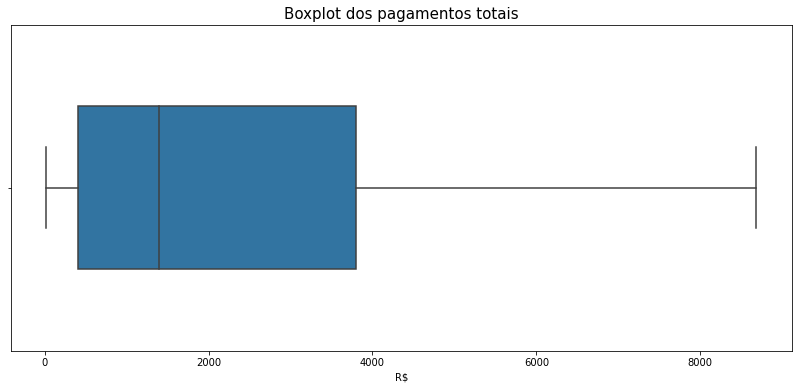

In [80]:
ax = sns.boxplot('Pagamento_total', data = dados, width = 0.5)
ax.figure.set_size_inches(14,6)
ax.set_title('Boxplot dos pagamentos totais', fontsize = 15)
ax.set_xlabel('R$', fontsize = 10)
ax

###Criando coluna de contas diárias

In [81]:
dados.head()

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_contrato,Servico_telefonia,Multiplas_linhas,Servico_internet,...,Backup_online,Protecao_dispositivo,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Pagamento_mensal,Pagamento_total
0,0002-ORFBO,1,Feminino,0,0,0,9,0,1,DSL,...,0,1,0,0,1,Um ano,0,Boleto,65.6,593.30
1,0003-MKNFE,1,Masculino,0,1,1,9,0,0,DSL,...,1,1,1,1,0,Mensal,1,Boleto,59.9,542.40
2,0004-TLHLJ,0,Masculino,0,1,1,4,0,1,Fibra optica,...,1,0,1,1,1,Mensal,0,Pagamento eletrônico,73.9,280.85
3,0011-IGKFF,0,Masculino,1,0,1,13,0,1,Fibra optica,...,0,0,1,0,0,Mensal,0,Pagamento eletrônico,98.0,1237.85
4,0013-EXCHZ,0,Feminino,1,0,1,3,0,1,Fibra optica,...,1,1,0,0,1,Mensal,0,Boleto,83.9,267.40


In [82]:
gasto_diario = (dados.Pagamento_mensal / 30).round(2)
dados.insert(19, 'Pagamento_diario', value = gasto_diario)
dados.head()

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_contrato,Servico_telefonia,Multiplas_linhas,Servico_internet,...,Protecao_dispositivo,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Pagamento_diario,Pagamento_mensal,Pagamento_total
0,0002-ORFBO,1,Feminino,0,0,0,9,0,1,DSL,...,1,0,0,1,Um ano,0,Boleto,2.19,65.6,593.30
1,0003-MKNFE,1,Masculino,0,1,1,9,0,0,DSL,...,1,1,1,0,Mensal,1,Boleto,2.00,59.9,542.40
2,0004-TLHLJ,0,Masculino,0,1,1,4,0,1,Fibra optica,...,0,1,1,1,Mensal,0,Pagamento eletrônico,2.46,73.9,280.85
3,0011-IGKFF,0,Masculino,1,0,1,13,0,1,Fibra optica,...,0,1,0,0,Mensal,0,Pagamento eletrônico,3.27,98.0,1237.85
4,0013-EXCHZ,0,Feminino,1,0,1,3,0,1,Fibra optica,...,1,0,0,1,Mensal,0,Boleto,2.80,83.9,267.40


In [83]:
dados.Pagamento_diario.describe()

count    7032.000000
mean        2.159891
std         1.002955
min         0.610000
25%         1.187500
50%         2.340000
75%         2.992500
max         3.960000
Name: Pagamento_diario, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


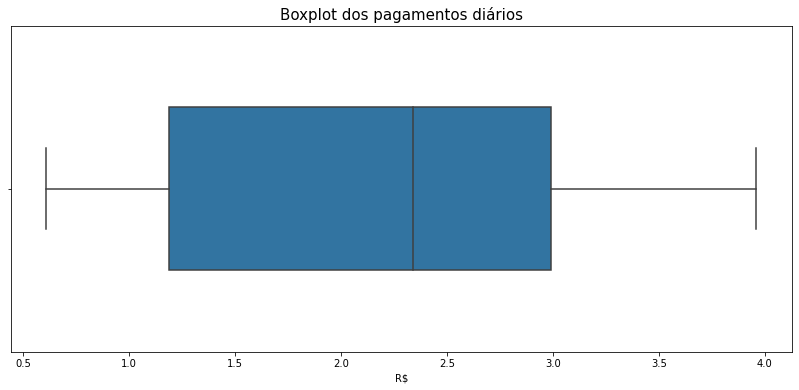

In [84]:
ax = sns.boxplot('Pagamento_diario', data = dados, width = 0.5)
ax.figure.set_size_inches(14,6)
ax.set_title('Boxplot dos pagamentos diários', fontsize = 15)
ax.set_xlabel('R$', fontsize = 10)
ax

##Segunda semana do challenge

As atividades da segunda semana são:

6.   Analisar a variável target: Churn;
7.   Visualizar a distribuição da variável Churn;
8.   Criar visualizações relevantes em relação ao Churn;
9.   Analisar a correlação das variáveis.

Além disso, temos uma atividades opcional:

*   Testar diferentes tipos de gráficos

### 7. Visualizando a distribuição da variável Churn

In [85]:
dados.Evasao.value_counts()

1    5163
0    1869
Name: Evasao, dtype: int64

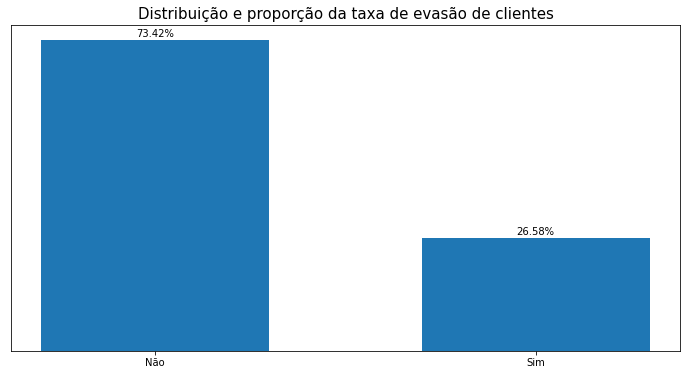

In [86]:
plt.figure(figsize = (12,6))

proporcao = round(dados.Evasao.value_counts(normalize = True)*100, 2)
labels = ['Não', 'Sim']
plt.title('Distribuição e proporção da taxa de evasão de clientes', fontsize = 15)
plt.bar(labels, proporcao, width = 0.6)
for z, x in enumerate(proporcao):
  plt.text(z - 0.05, x + 1, str(x) + '%')
plt.yticks([])

plt.show()

Nessa visualização, podemos perceber que 73% da base de clientes não saíram. Contudo, 27% do dos clientes optaram por deixar a empresa. Não podemos concluir que é uma taxa alta ou baixa, pois seria necessário uma análise de mercado para verificar a taxa de evasão de clientes em empresas da área de comercialização de serviços de voz e Internet.

### 8. Criando visualizações relevantes em relação ao Churn

####Relação de meses de contrato x taxa de evasão

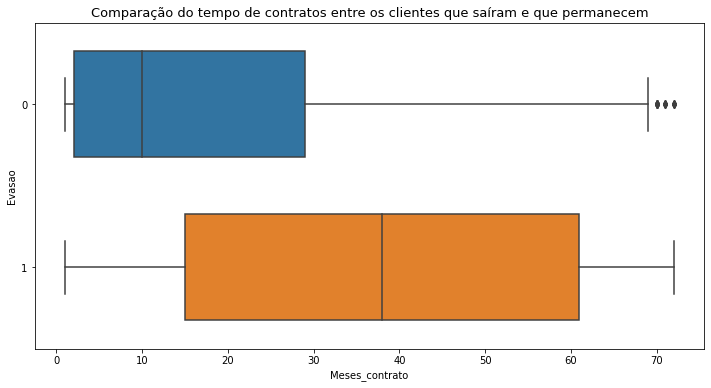

In [87]:
plt.figure(figsize = (12,6))

ax = sns.boxplot(data = dados, x = 'Meses_contrato', y = 'Evasao', orient = 'h', width = 0.65)
ax.set_title ('Comparação do tempo de contratos entre os clientes que saíram e que permanecem', fontsize = 13)

plt.show()

Temos algumas informações interessantes aqui nessa visualização:<p>
Clientes que saíram: saíram da empresa com contratos até de 30 meses, com mediana aproximadamente de 10 meses.<p>
Clientes que ficaram: estão na empresa com contratos entre 15 e 60 meses, com mediana em aproximadamente 38 meses.<p>
Percebemos aqui que os clientes que saem, experimentam nossos serviços com poucos meses e há uma tendência de permanência quando o contrato ultrapassa os 30 primeiros meses.


####Relação de gastos x taxa de evasão

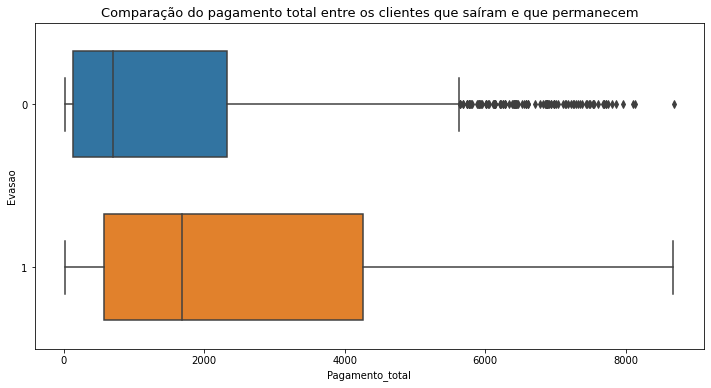

In [88]:
plt.figure(figsize = (12,6))

ax = sns.boxplot(data = dados, x = 'Pagamento_total', y = 'Evasao', orient = 'h', width = 0.65)
ax.set_title ('Comparação do pagamento total entre os clientes que saíram e que permanecem', fontsize = 13)

plt.show()

Percebemos aqui que: <p>
Clientes que saíram: visualmente, tendem a pagar no máximo pouco mais de R$2.000,00. <p>
Clientes que permanecem: Como são clientes com contratos duradouros, obviamente são os que deixam mais dinheiro na empresa.

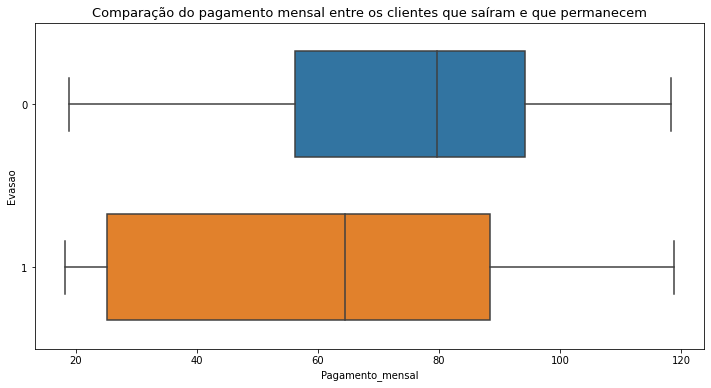

In [89]:
plt.figure(figsize = (12,6))

ax = sns.boxplot(data = dados, x = 'Pagamento_mensal', y = 'Evasao', orient = 'h', width = 0.65)
ax.set_title ('Comparação do pagamento mensal entre os clientes que saíram e que permanecem', fontsize = 13)

plt.show()

Já aqui o compartamento é inverso. Os clientes que pagaram mais mensalmente tendem sair da empresa.

####Relação de clientes idosos x taxa de evasão

In [90]:
saiu = (dados[dados.Evasao == 0].Idoso.value_counts(normalize = True)*100).to_frame(name = 'Saiu').round(2)
continuou = (dados[dados.Evasao == 1].Idoso.value_counts(normalize = True)*100).to_frame(name = 'Continuou').round(2)

evasao_idoso = pd.concat([saiu, continuou], axis =1)
evasao_idoso.index.name = 'Idoso'
evasao_idoso.rename(index = {0: 'Sim', 1 : 'Não'}, inplace = True)
evasao_idoso

,Saiu,Continuou
Idoso,,
Sim,74.53,87.1
Não,25.47,12.9


Percebemos aqui, que 74,53% dos clientes que deiraxam a empresa são idosos.

####Relação de clientes por tipo de contrato x taxa de evasão

In [91]:
saiu = (dados[dados.Evasao == 0].Tipo_contrato.value_counts(normalize = True)*100).to_frame(name = 'Saiu').round(2)
continuou = (dados[dados.Evasao == 1].Tipo_contrato.value_counts(normalize = True)*100).to_frame(name = 'Continuou').round(2)

evasao_internet = pd.concat([saiu, continuou], axis =1)
evasao_internet.index.name = 'Tipo de contrato'
evasao_internet

,Saiu,Continuou
Tipo de contrato,,
Mensal,88.55,43.00
Um ano,8.88,25.30
Dois anos,2.57,31.71


Percebemos aqui, que 88,55% dos cientes que saíram da empresa tem contrato de pagamento mensal. 

####Analisando a correlação de variáveis

In [92]:
correlacao_evasao = dados.corr()[0:1]
correlacao_evasao

,Evasao,Idoso,Parceiro,Dependentes,Meses_contrato,Servico_telefonia,Multiplas_linhas,Seguranca_online,Backup_online,Protecao_dispositivo,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Fatura_digital,Pagamento_diario,Pagamento_mensal,Pagamento_total
Evasao,1.0,-0.150541,-0.149982,-0.163128,0.354049,0.011691,0.036148,0.140457,0.163164,0.168406,0.142106,0.207402,0.206388,0.191454,-0.192914,-0.192858,0.199484


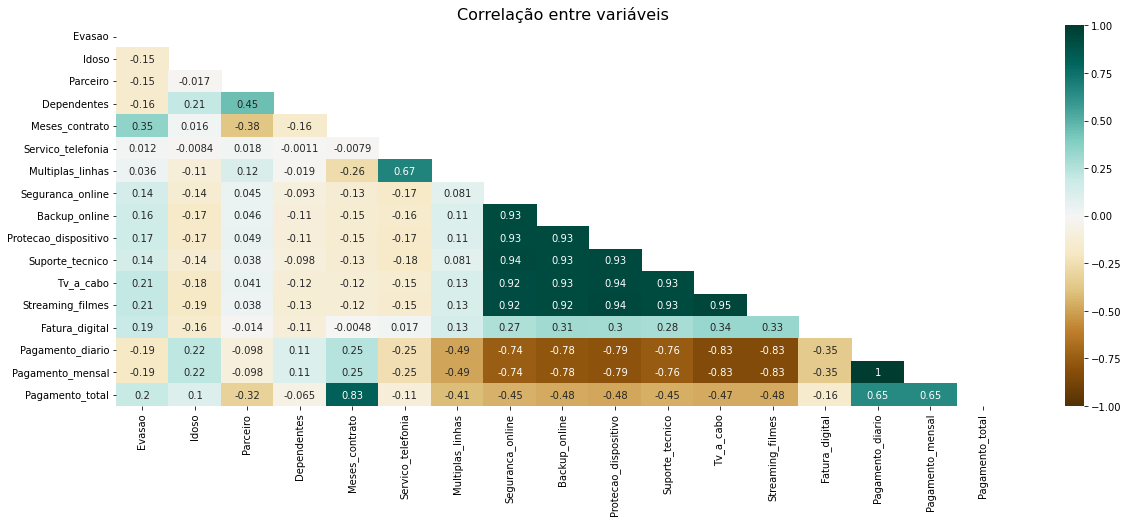

In [93]:
plt.figure(figsize = (20,7))

mask = np.triu(np.ones_like(dados.corr(), dtype = bool))
ax = sns.heatmap(dados.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG', mask = mask)
ax.set_title('Correlação entre variáveis', fontsize = 16)

plt.show()

A coluna que devemos no atender nesse gráfico é a primeira, uma vez que estamso avaliando apenas a taxa de evasão com as demais features do nosso dataset. Podemos perceber que há uma forte correção negativa entre as variáveis Idoso, Parceiro, Dependentes, Pagamento diário e Pagamento Mensal, incicando que essas variáveis influenciam na decisão do cliente cancelar o plano. Graficamente, não temos nenhuma correção forte indicando que alguma variável influi diretamente na permanencia do cliente na Alura Voz.